In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
#nltk.download()

In [4]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [5]:
share_repurchase_paragraph = pd.read_csv('data/share_repurchase_paragraphs.csv')

In [6]:
share_repurchase_paragraph.head(15)

ticker      accession_number               data_key_friendly_name  \
0       A  0001090872-17-000018  Share Repurchase Authorization Date   
1       A  0001090872-17-000018       Share Repurchase Authorization   
2       A  0001090872-17-000018           Share Repurchase Intention   
3       A  0001090872-17-000018               Share Repurchase Count   
4       A  0001090872-17-000018    Amount Spent on Share Repurchases   
5     AAL  0000006201-18-000009  Share Repurchase Authorization Date   
6     AAL  0000006201-18-000009       Share Repurchase Authorization   
7     AAL  0000006201-18-000009           Share Repurchase Intention   
8     AAL  0000006201-18-000009               Share Repurchase Count   
9     AAL  0000006201-18-000009    Amount Spent on Share Repurchases   
10    AAP  0001158449-18-000039           Share Repurchase Intention   
11    AAP  0001158449-18-000039               Share Repurchase Count   
12    AAP  0001158449-18-000039  Share Repurchase Authorization Date   
13    AAP  0001158449-18-000039       Share Repurchase Authorization   
14    AAP  0001158449-18-000039    Amount Spent on Share Repurchases   

                                                 text   data_value  \
0                                        May 28, 2015     20150528   
1   The 2015 share repurchase program authorizes t...   1140000000   
2         remaining authorization to repurchase up to    610000000   
3                                         repurchased      4100000   
4                                         repurchased    194000000   
5                                           July 2014     20140715   
6               share repurchase programs aggregating  11000000000   
7          remained unused under a repurchase program    450000000   
8                                         repurchased     33900000   
9                                         repurchased   1600000000   
10  remaining under its stock repurchase program a...    415100000   
11                                        repurchased        57000   
12                                       May 14, 2012     20120514   
13                                 repurchase program    500000000   
14                            at an aggregate cost of      6500000   

    reported_data_value reported_units  \
0           20200000.00           ones   
1                  1.14       billions   
2                610.00       millions   
3                  4.10       millions   
4                194.00       millions   
5           20100000.00           ones   
6                 11.00       billions   
7                450.00       millions   
8                 33.90       millions   
9                  1.60       billions   
10               415.10       millions   
11                57.00      thousands   
12          20100000.00           ones   
13               500.00       millions   
14                 6.50       millions   

                                       paragraph_text  
0   On May 28, 2015 we  announced that our board  ...  
1   On May 28, 2015 we  announced that our board  ...  
2   Table of Contents   2016, upon the completion ...  
3   Table of Contents   2016, upon the completion ...  
4   Table of Contents   2016, upon the completion ...  
5   4. Share Repurchase Programs and Dividends   S...  
6   4. Share Repurchase Programs and Dividends   S...  
7   4. Share Repurchase Programs and Dividends   S...  
8   During the year ended  December 31, 2017,  we ...  
9   During the year ended  December 31, 2017,  we ...  
10  The Company's stock repurchase program allows ...  
11  The Company repurchased 57 thousand and 116 th...  
12  The Company's stock repurchase program allows ...  
13  The Company's stock repurchase program allows ...  
14  The Company repurchased 57 thousand and 116 th...

In [7]:
share_repurchase_paragraph.text.value_counts()


repurchased                                                                                                                                            233
Total                                                                                                                                                   40
purchased                                                                                                                                               29
repurchase                                                                                                                                              23
2017                                                                                                                                                    22
December 2017                                                                                                                                           19
at a cost of                                                          

In [8]:
share_repurchase_paragraph.ticker.value_counts()


AAPL     14
NLSN     10
STZ      10
LRCX      9
CTSH      9
PFE       7
ANDV      7
BAX       7
PEP       7
BKNG      7
CCL       7
APC       7
BMY       7
MCK       7
PHM       7
FOXA      6
EBAY      6
TJX       6
ABT       6
TXN       6
PSX       6
AMAT      6
WHR       6
GOOGL     6
INFO      6
CL        6
EW        6
BAC       6
MPC       6
GPN       6
         ..
TWX       2
PH        2
LYB       2
CVX       2
WDC       2
PSA       2
NWL       2
XOM       2
MLM       2
MAT       2
BLL       2
ZION      2
URI       2
F         2
APA       2
EFX       2
DOV       2
CHRW      2
DHR       2
DISH      2
AMZN      2
LUK       1
HCP       1
GWW       1
FLR       1
HAL       1
FAST      1
LAKE      1
AIV       1
DLTR      1
Name: ticker, Length: 434, dtype: int64

In [9]:
share_repurchase_paragraph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 8 columns):
ticker                    1781 non-null object
accession_number          1781 non-null object
data_key_friendly_name    1781 non-null object
text                      1781 non-null object
data_value                1781 non-null int64
reported_data_value       1781 non-null float64
reported_units            1781 non-null object
paragraph_text            1781 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 111.4+ KB


In [10]:
share_repurchase_paragraph.accession_number.value_counts()


0000320193-17-000070    14
0001564590-18-001617    10
0000707549-17-000100     9
0001058290-18-000009     9
0001075531-18-000015     7
0001564590-18-002954     7
0000773910-18-000012     7
0000927653-17-000007     7
0000822416-18-000009     7
0000050104-18-000054     7
0000077476-18-000012     7
0000014272-18-000055     7
0000078003-18-000027     7
0000815097-18-000005     7
0001047469-18-000856     6
0000006951-17-000038     6
0001510295-18-000024     6
0001598014-18-000020     6
0001326801-18-000009     6
0001099800-18-000007     6
0000070858-18-000009     6
0001534701-18-000065     6
0000106640-18-000019     6
0001564590-18-002832     6
0000086521-18-000019     6
0001193125-18-107423     6
0001123360-18-000007     6
0001564590-18-002345     6
0000021665-18-000003     6
0000766421-18-000015     6
                        ..
0001193125-18-054181     2
0001193125-18-067489     2
0001174922-18-000019     2
0001091667-18-000025     2
0001558370-18-000981     2
0000037996-18-000015     2
0

In [11]:
for i in range(1, len(share_repurchase_paragraph[0:10])):
    print('------------------------------------')
    print(share_repurchase_paragraph['ticker'][i])
    print (share_repurchase_paragraph['data_key_friendly_name'][i])
    print('')
    print(share_repurchase_paragraph['text'][i])
    print('')
    print(share_repurchase_paragraph['paragraph_text'][i])
    print('')

------------------------------------
A
Share Repurchase Authorization

The 2015 share repurchase program authorizes the purchase of up to

On May 28, 2015 we  announced that our board  of directors had approved a  new share repurchase program  (the   "2015 repurchase program"). The 2015 share repurchase program authorizes the purchase of up to $1.14  billion   of our common stock at the company's discretion  through and including November 1, 2018. The 2015  repurchase   program does  not require  the company  to  acquire a  specific number  of  shares and  may be  suspended  or   discontinued at any time. During the year ended October 31,                                                        95

------------------------------------
A
Share Repurchase Intention

remaining authorization to repurchase up to

Table of Contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  Du

In [12]:
repurchase_text = ["Share Repurchase Authorization","Share Repurchase Intention","Share Repurchase Count","Amount Spent on Share Repurchases","Share Repurchase Authorization Date","Share Repurchase Authorization","Amount Spent on Share Repurchases"]

In [13]:
# reading the html

In [14]:
from bs4 import BeautifulSoup
html="0000007332-18-000016.html"
soup = BeautifulSoup(html,"lxml")
print(soup.text)

0000007332-18-000016.html


In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import glob
from urllib.request import urlopen, Request 
from path import Path, getcwdu
import os
from pathlib import PurePath

In [16]:
train_file_list  = [PurePath(file).name for file in glob.iglob('data/nc_training_filings/*')]
train_path_list = [PurePath(os.getcwd()).joinpath(file).as_posix() for file in glob.iglob('data/nc_training_filings/*')]
train_accession_ids = [PurePath(file).stem for file in train_file_list]
train_cik_nbrs = [x.split(sep='-')[0] for x in train_accession_ids]

In [17]:
train_file_list[1]

'0000004127-17-000033.html'

In [18]:
train_path_list[1]

'C:/Users/Suhasini/gitdir/data-science/data-question-8-waving-tigers/data/nc_training_filings/0000004127-17-000033.html'

In [19]:
train_accession_ids[1]

'0000004127-17-000033'

In [20]:
train_cik_nbrs[1]

'0000004127'

In [21]:
import urllib


In [22]:
share_repurchase_paragraph[share_repurchase_paragraph.duplicated(keep=False)]


ticker      accession_number             data_key_friendly_name  \
107    ALGN  0001097149-18-000010  Amount Spent on Share Repurchases   
111    ALGN  0001097149-18-000010  Amount Spent on Share Repurchases   
228     AYI  0001144215-17-000106      Unknown Share Repurchase Data   
229     AYI  0001144215-17-000106      Unknown Share Repurchase Data   
254     BAX  0001564590-18-002954     Share Repurchase Authorization   
255     BAX  0001564590-18-002954     Share Repurchase Authorization   
679    FLIR  0000354908-18-000014      Unknown Share Repurchase Data   
680    FLIR  0000354908-18-000014      Unknown Share Repurchase Data   
729     GPC  0000040987-18-000002      Unknown Share Repurchase Data   
730     GPC  0000040987-18-000002      Unknown Share Repurchase Data   
824     HRL  0001104659-17-074227      Unknown Share Repurchase Data   
825     HRL  0001104659-17-074227      Unknown Share Repurchase Data   
1003    LEG  0000058492-18-000004      Unknown Share Repurchase Data   
1004    LEG  0000058492-18-000004      Unknown Share Repurchase Data   
1357     PX  0000884905-18-000014     Share Repurchase Authorization   
1361     PX  0000884905-18-000014     Share Repurchase Authorization   
1441   SCHW  0000316709-18-000009     Share Repurchase Authorization   
1442   SCHW  0000316709-18-000009     Share Repurchase Authorization   

                                                   text  data_value  \
107                                         repurchased    50000000   
111                                         repurchased    50000000   
228                                          repurchase     2000000   
229                                          repurchase     2000000   
254   The board of directors increased this authorit...  1500000000   
255   The board of directors increased this authorit...  1500000000   
679   the Company's Board of Directors authorized th...    15000000   
680   the Company's Board of Directors authorized th...    15000000   
729   the Board of Directors announced that it had a...    15000000   
730   the Board of Directors announced that it had a...    15000000   
824   the Company's Board of Directors authorized th...    10000000   
825   the Company's Board of Directors authorized th...    10000000   
1003  the Company was authorized by the Board of Dir...    10000000   
1004  the Company was authorized by the Board of Dir...    10000000   
1357  the Company's board of directors approved the ...  1500000000   
1361  the Company's board of directors approved the ...  1500000000   
1441  two authorizations under this program by CSC's...   500000000   
1442  two authorizations under this program by CSC's...   500000000   

      reported_data_value reported_units  \
107                  50.0       millions   
111                  50.0       millions   
228                   2.0       millions   
229                   2.0       millions   
254                   1.5       billions   
255                   1.5       billions   
679                  15.0       millions   
680                  15.0       millions   
729                  15.0       millions   
730                  15.0       millions   
824                  10.0       millions   
825                  10.0       millions   
1003                 10.0       millions   
1004                 10.0       millions   
1357                  1.5       billions   
1361                  1.5       billions   
1441                500.0       millions   
1442                500.0       millions   

                                         paragraph_text  
107   Stock Repurchases: April 2016 Repurchase Progr...  
111   Stock Repurchases: April 2016 Repurchase Progr...  
228   Issuer Purchases of Equity Securities   During...  
229   Issuer Purchases of Equity Securities   During...  
254   As authorized by the board of directors, the c...  
255   As authorized by the board of directors, the c...  
679   On February 5, 2015, the Company's Bo

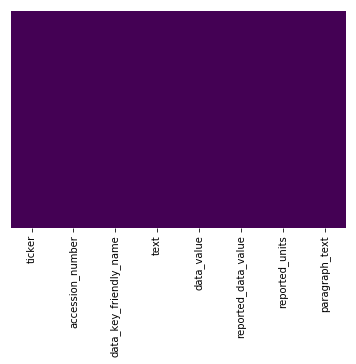

In [23]:
# want to see all missing values on your df
sns.heatmap(share_repurchase_paragraph.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [24]:
for col in share_repurchase_paragraph.columns:
    print(col, 'unique values:____________________')
    print(share_repurchase_paragraph[col].unique())

ticker unique values:____________________
['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AES' 'AET' 'AFL' 'AGN' 'AGRO' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALGN' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP'
 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC' 'APD' 'APH'
 'APTV' 'ARNC' 'ATVI' 'AVB' 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BABA' 'BAC'
 'BAX' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHGE' 'BIIB' 'BK' 'BKNG' 'BLK' 'BLL'
 'BMY' 'BSX' 'BWA' 'C' 'CA' 'CAG' 'CAH' 'CAKE' 'CAT' 'CB' 'CBOE' 'CBRE'
 'CBS' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR'
 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CMG' 'CMI' 'CNC' 'COF' 'COG' 'COL'
 'COO' 'COP' 'COST' 'COTY' 'CPB' 'CSCO' 'CSX' 'CTAS' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'D' 'DAL' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISH'
 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DVA' 'DWDP' 'EA' 'EBAY' 'ECL' 'EFX' 'EL'
 'EMN' 'EMR' 'EOG' 'EQR' 'EQT' 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR' 'EVHC' 'EW'
 

# reading multiple html files


In [25]:
import os
import glob
from bs4 import BeautifulSoup

In [26]:
training_filings_list= []

In [27]:
#import os
#import glob
# append a path for each html file in the directory
for root, dirs, files in os.walk('data/nc_training_filings/'):
    training_filings_list += glob.glob(os.path.join(root, '*.html'))

training_filings_list

['data/nc_training_filings\\0000002969-17-000039.html',
 'data/nc_training_filings\\0000004127-17-000033.html',
 'data/nc_training_filings\\0000004281-18-000042.html',
 'data/nc_training_filings\\0000004962-18-000032.html',
 'data/nc_training_filings\\0000004977-18-000054.html',
 'data/nc_training_filings\\0000005272-18-000022.html',
 'data/nc_training_filings\\0000005513-18-000016.html',
 'data/nc_training_filings\\0000006201-18-000009.html',
 'data/nc_training_filings\\0000006281-17-000144.html',
 'data/nc_training_filings\\0000006951-17-000038.html',
 'data/nc_training_filings\\0000007084-18-000012.html',
 'data/nc_training_filings\\0000008670-17-000010.html',
 'data/nc_training_filings\\0000010795-17-000021.html',
 'data/nc_training_filings\\0000012927-18-000007.html',
 'data/nc_training_filings\\0000014272-18-000055.html',
 'data/nc_training_filings\\0000014693-17-000119.html',
 'data/nc_training_filings\\0000016732-17-000058.html',
 'data/nc_training_filings\\0000016918-17-000029

In [28]:
len(training_filings_list)

435

In [29]:
training_filings_list[0]

'data/nc_training_filings\\0000002969-17-000039.html'

In [30]:
with open(training_filings_list[0]) as file:
    file_html = file.read()

In [31]:
type(file_html)

str

In [32]:
file_html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta name="generator" content=\n"HTML Tidy for HTML5 (experimental) for Linux https://github.com/w3c/tidy-html5/tree/68a9e74" />\n<!-- Document created using Wdesk 1 -->\n<!-- Copyright 2017 Workiva -->\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Document</title>\n<title>Document</title>\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n\n<style type="text/css">\n/*<![CDATA[*/\n body.c653 {font-family:Times New Roman;font-size:10pt;}\n table.c652 {padding-bottom:16px;font-family:Times New Roman; font-size:10pt;}\n div.c651 {font-family: inherit; font-size: 10pt; line-height: 120%; padding-left: 48px}\n td.c650 {width:108px;}\n d

In [33]:
soup_html = BeautifulSoup(file_html)

C:\Users\Suhasini\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Suhasini\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [34]:
type(soup_html)

bs4.BeautifulSoup

In [35]:
print(soup_html.body.text)



Table of Contents


UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
WASHINGTON, D.C. 20549
FORM 10-K











x


ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the
fiscal year ended 30 September 2017





OR











Â¨


TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE
ACT OF 1934 For the transition period from  
to  





Commission file number 001-04534
AIR PRODUCTS AND CHEMICALS, INC.












7201 Hamilton Boulevard


 


State of incorporation: Delaware




Allentown, Pennsylvania, 18195-1501


 


I.R.S. identification number: 23-1274455




Tel. (610) 481-4911


 


 




Securities registered pursuant to Section 12(b) of the Act:












Title of Each Class:


 


Registered on:




Common Stock, par value $1.00 per share


 


New York Stock Exchange




2.0% Euro Notes due 2020


 


New York Stock Exchange




0.375% Euro Notes due 2021


 


New York Stock Exchange




1.0% Euro Notes due 

In [36]:
share_repurchase_paragraph.head(5) #0000002969-17-000039.html

ticker      accession_number               data_key_friendly_name  \
0      A  0001090872-17-000018  Share Repurchase Authorization Date   
1      A  0001090872-17-000018       Share Repurchase Authorization   
2      A  0001090872-17-000018           Share Repurchase Intention   
3      A  0001090872-17-000018               Share Repurchase Count   
4      A  0001090872-17-000018    Amount Spent on Share Repurchases   

                                                text  data_value  \
0                                       May 28, 2015    20150528   
1  The 2015 share repurchase program authorizes t...  1140000000   
2        remaining authorization to repurchase up to   610000000   
3                                        repurchased     4100000   
4                                        repurchased   194000000   

   reported_data_value reported_units  \
0          20200000.00           ones   
1                 1.14       billions   
2               610.00       millions   
3                 4.10       millions   
4               194.00       millions   

                                      paragraph_text  
0  On May 28, 2015 we  announced that our board  ...  
1  On May 28, 2015 we  announced that our board  ...  
2  Table of Contents   2016, upon the completion ...  
3  Table of Contents   2016, upon the completion ...  
4  Table of Contents   2016, upon the completion ...

In [37]:
share_repurchase_paragraph[share_repurchase_paragraph.accession_number == '0000002969-17-000039']

ticker      accession_number               data_key_friendly_name  \
194    APD  0000002969-17-000039  Share Repurchase Authorization Date   
195    APD  0000002969-17-000039       Share Repurchase Authorization   
196    APD  0000002969-17-000039           Share Repurchase Intention   

                                                  text  data_value  \
194                                  15 September 2011    20110915   
195  the Board of Directors authorized the repurcha...  1000000000   
196          in share repurchase authorization remains   485300000   

     reported_data_value reported_units  \
194           20100000.0           ones   
195               1000.0       millions   
196                485.3       millions   

                                        paragraph_text  
194  On 15 September 2011, the Board of Directors a...  
195  On 15 September 2011, the Board of Directors a...  
196  On 15 September 2011, the Board of Directors a...

In [38]:
share_repurchase_paragraph[share_repurchase_paragraph.accession_number == '0000004127-17-000033']

ticker      accession_number               data_key_friendly_name  \
1515   SWKS  0000004127-17-000033  Share Repurchase Authorization Date   
1516   SWKS  0000004127-17-000033    Amount Spent on Share Repurchases   
1517   SWKS  0000004127-17-000033               Share Repurchase Count   
1518   SWKS  0000004127-17-000033           Share Repurchase Intention   
1519   SWKS  0000004127-17-000033       Share Repurchase Authorization   

                                                   text  data_value  \
1515                                   January 17, 2017    20170117   
1516                                         repurchase   432300000   
1517                                         repurchase     4700000   
1518  remained available under the January 17, 2017,...   174100000   
1519  the Board of Directors approved a new share re...   500000000   

      reported_data_value reported_units  \
1515           20200000.0           ones   
1516                432.3       millions   
1517                  4.7       millions   
1518                174.1       millions   
1519                500.0       millions   

                                         paragraph_text  
1515  SHARE REPURCHASE   On January 17, 2017, the Bo...  
1516  SHARE REPURCHASE   On January 17, 2017, the Bo...  
1517  SHARE REPURCHASE   On January 17, 2017, the Bo...  
1518  SHARE REPURCHASE   On January 17, 2017, the Bo...  
1519  SHARE REPURCHASE   On January 17, 2017, the Bo...

In [39]:
with open(training_filings_list[1]) as file:
    file_html2 = file.read()

In [40]:
soup_html2 =BeautifulSoup(file_html2)

C:\Users\Suhasini\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Suhasini\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [41]:
print(soup_html2.body.text)













 




UNITED STATES SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-K











Ã¾


ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934




For the fiscal year ended September 29,
2017
OR











o


TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934




For the transition period from __________to__________
Commission file number 001-05560
SKYWORKS SOLUTIONS, INC.
(Exact name of registrant as specified in its charter)











Delaware


04-2302115




(State or other jurisdiction of incorporation or organization)


(I.R.S. Employer Identification No.)















20 Sylvan Road, Woburn, Massachusetts


01801




(Address of principal executive offices)


(Zip Code)




 


 




Registrant's telephone number, including area code:
(781) 376-3000




Securities registered pursuant to Section 12(b) of the Act:











Title of Each Class


Name of Each Exchange on Which Regis

In [42]:
len(file_html)

2027493

In [43]:
words_html1 = word_tokenize(file_html)

In [74]:
len(words_html1)

628865

In [133]:
sent_token = sent_tokenize(file_html)

In [134]:
len(sent_token)

1792

In [136]:
sent_token

['<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta name="generator" content=\n"HTML Tidy for HTML5 (experimental) for Linux https://github.com/w3c/tidy-html5/tree/68a9e74" />\n<!-- Document created using Wdesk 1 -->\n<!-- Copyright 2017 Workiva -->\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Document</title>\n<title>Document</title>\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n\n<style type="text/css">\n/*<!',
 '[CDATA[*/\n body.c653 {font-family:Times New Roman;font-size:10pt;}\n table.c652 {padding-bottom:16px;font-family:Times New Roman; font-size:10pt;}\n div.c651 {font-family: inherit; font-size: 10pt; line-height: 120%; padding-left: 48px}\n td.c650 {width:108px

In [135]:
filtered_set = []

In [77]:
for w in words_html1:
    if w not in stop_words:
        filtered_set.append(w)
print(filtered_set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [78]:
tokens = [w for w in word_tokenize(file_html.lower()) if w.isalpha()]

In [79]:
no_stops = [t for t in tokens if t not in stopwords.words('english')]

In [144]:
no_stops = no_stops[:300000]

In [145]:
no_stops

['heating',
 'applications',
 'including',
 'steel',
 'certain',
 'nonferrous',
 'metals',
 'glass',
 'cement',
 'industries',
 'nitrogen',
 'applications',
 'used',
 'food',
 'processing',
 'freezing',
 'preserving',
 'flavor',
 'nitrogen',
 'inerting',
 'used',
 'various',
 'fields',
 'including',
 'metals',
 'chemical',
 'semiconductor',
 'industries',
 'helium',
 'used',
 'laboratories',
 'healthcare',
 'cooling',
 'industries',
 'pressurizing',
 'purging',
 'lifting',
 'argon',
 'used',
 'metals',
 'industries',
 'unique',
 'inerting',
 'thermal',
 'conductivity',
 'properties',
 'industrial',
 'gases',
 'also',
 'used',
 'welding',
 'providing',
 'healthcare',
 'utilized',
 'various',
 'manufacturing',
 'processes',
 'make',
 'efficient',
 'optimize',
 'div',
 'hr',
 'div',
 'table',
 'contents',
 'div',
 'distribute',
 'gases',
 'customers',
 'variety',
 'supply',
 'modes',
 'div',
 'span',
 'liquid',
 'span',
 'product',
 'delivered',
 'bulk',
 'liquid',
 'gaseous',
 'form',
 '

In [146]:
text= nltk.Text(no_stops)

In [137]:
sent_text = nltk.Text(sent_token)

In [147]:
sent_text[0]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta name="generator" content=\n"HTML Tidy for HTML5 (experimental) for Linux https://github.com/w3c/tidy-html5/tree/68a9e74" />\n<!-- Document created using Wdesk 1 -->\n<!-- Copyright 2017 Workiva -->\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Document</title>\n<title>Document</title>\n<title>Document</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n<title>Exhibit</title>\n\n<style type="text/css">\n/*<!'

In [148]:
sent_text.concordance('share',width=500,lines=50)

No matches


In [149]:
type(text)


nltk.text.Text

In [167]:
text.concordance('date',width=1000,lines=300)


Displaying 1 of 1 matches:
uarantees sale equipment constituted approximately consolidated sales fiscal year fiscal year fiscal year div hr div table contents div span backlog equipment orders approximately billion span september span compared total backlog approximately billion span september span primarily contains air products share contract joint venture jazan saudi arabia construction industrial gas facility supply gases saudi arabian oil company saudi aramco revenue contract recognized method based costs incurred date compared total estimated costs incurred company estimates approximately total sales backlog span september span recognized revenue fiscal year dependent execution schedules relevant div international operations div company subsidiaries affiliates interests conducts business countries outside united states international businesses subject risks customarily encountered foreign operations including fluctuations foreign currency exchange rates controls import export con

In [182]:
text.collocations(num=250,window_size=3)

span span; bottom div; fiscal year; span million; vice president; year
span; note span; industrial gases; united states; million span; table
contents; chief officer; president chief; span fiscal; risk factors;
executive vice; fiscal span; executive president; approximately span;
corporate controller; carbon monoxide; human resources; included item;
foreign currency; previously served; officer became; constituted
approximately; div bottom; particular patent; patent license; vice
chief; saudi arabia; senior vice; million fiscal; consolidated
statements; research development; senior president; span consolidated;
became vice; controller accounting; industrial gas; financial
statements; calling sec; form reports; europe asia; management time;
new improved; reference room; time consider; transport storage;
environmental laws; crude helium; consolidated sales; chairman chief;
annual report; carbon syngas; commitments contingencies; compared
total; control pollution; costs incurred; could adve

In [80]:
from collections import Counter

In [55]:
len(no_stops)

108753

In [110]:
type(no_stops)

list

In [57]:

n = 50

In [58]:
dict1 = dict(Counter(no_stops))

In [65]:
len(dict1)

3876

In [60]:
type(dict1)

dict

In [63]:
dict1.keys()


dict_keys(['doctype', 'html', 'public', 'xhtml', 'http', 'head', 'meta', 'generator', 'tidy', 'experimental', 'linux', 'https', 'document', 'created', 'using', 'wdesk', 'copyright', 'workiva', 'title', 'exhibit', 'style', 'cdata', 'times', 'new', 'roman', 'inherit', 'center', 'collapse', 'left', 'auto', 'bold', 'underline', 'justify', 'arial', 'right', 'top', 'solid', 'cceeff', 'bottom', 'height', 'overflow', 'hidden', 'italic', 'color', 'summary', 'none', 'middle', 'pt', 'always', 'wingdings', 'normal', 'body', 'div', 'table', 'contents', 'hr', 'united', 'states', 'securities', 'exchange', 'commission', 'washington', 'span', 'form', 'tr', 'td', 'x', 'annual', 'report', 'pursuant', 'section', 'act', 'fiscal', 'year', 'ended', 'september', 'transition', 'period', 'file', 'number', 'air', 'products', 'chemicals', 'hamilton', 'boulevard', 'state', 'incorporation', 'delaware', 'allentown', 'pennsylvania', 'identification', 'tel', 'registered', 'b', 'class', 'common', 'stock', 'par', 'value

In [64]:
for k,v in dict1.items():
    print(k  , v)

doctype 1
html 3
public 20
xhtml 1
http 38
head 1
meta 1
generator 1
tidy 1
experimental 1
linux 1
https 1
document 28
created 14
using 42
wdesk 13
copyright 13
workiva 13
title 20
exhibit 81
style 2
cdata 1
times 32
new 110
roman 21
inherit 131
center 67
collapse 11
left 165
auto 11
bold 77
underline 14
justify 2
arial 120
right 44
top 45
solid 148
cceeff 74
bottom 17498
height 7
overflow 8
hidden 8
italic 15
color 2
summary 18
none 6
middle 44
pt 2
always 2
wingdings 5
normal 13
body 1
div 18608
table 475
contents 137
hr 175
united 54
states 40
securities 59
exchange 115
commission 14
washington 3
span 4098
form 109
tr 2404
td 17581
x 8
annual 73
report 91
pursuant 39
section 164
act 56
fiscal 192
year 289
ended 79
september 296
transition 27
period 114
file 11
number 44
air 417
products 411
chemicals 154
hamilton 6
boulevard 6
state 22
incorporation 7
delaware 4
allentown 8
pennsylvania 14
identification 5
tel 1
registered 13
b 95
class 5
common 83
stock 224
par 6
value 286
per 80
s

address 7
seasonality 1
seasonal 1
inventories 17
limited 27
inventory 8
reasonable 28
schedule 12
consists 7
supplied 3
homogeneous 2
base 11
end 44
single 7
accounts 37
revenues 13
concentrations 1
specific 20
negative 8
trend 7
affecting 8
one 50
although 9
could 91
adverse 20
impact 116
governmental 3
government 12
renegotiation 1
profits 2
termination 111
would 51
respective 8
ages 1
november 30
follow 3
respect 42
offices 7
stated 9
name 9
age 8
office 16
scott 13
crocco 13
vice 36
president 43
chief 40
became 6
senior 30
controller 5
russell 3
flugel 3
decision 10
consolidation 8
seifi 15
ghasemi 21
chairman 13
previously 32
served 5
rockwood 1
holdings 9
beginning 31
member 1
committee 41
jennifer 4
grant 13
human 16
resources 20
joining 1
pfizer 1
oncology 1
divisions 10
sean 2
counsel 10
secretary 17
joy 1
corning 2
painter 2
manager 3
chain 1
strategy 4
dr 1
samir 2
serhan 3
december 25
hyco 5
worked 2
leadership 1
beyond 6
evaluating 13
investment 81
elsewhere 1
following 6

add 18
twelve 11
maintained 6
consistent 12
needs 3
foreseeable 2
elect 8
accrue 4
intent 2
permanently 2
reinvest 3
alternatives 1
specifically 5
noncurrent 47
intercompany 8
loans 6
contributions 38
source 8
payables 14
maturities 10
forward 31
hedged 7
exposures 15
remeasurement 1
hedging 15
eliminate 5
postretirement 27
making 5
funding 14
decisions 4
implications 1
incentive 57
aircraft 3
utilize 10
arrangement 9
enhance 1
usefulness 1
internally 1
coal 2
april 10
acwa 4
holding 4
obligation 31
engineer 4
procure 4
construct 6
range 19
changzhi 4
medium 1
size 11
fixed 19
fee 1
cleaner 2
consisted 5
repayments 2
repayment 14
eurobond 5
matured 3
august 11
issuance 18
exercises 5
issuances 2
totaling 8
finalization 1
decided 1
loan 8
structure 7
revolving 5
credit 48
syndicate 2
banks 2
unsecured 6
supports 2
covenant 4
maximum 10
ratio 7
expressed 2
terminates 5
replaces 2
early 22
borrowed 2
covenants 5
repaid 2
sixth 1
week 1
obligated 4
unconditional 14
summarizes 14
thereafter

withhold 3
thereto 5
hereunder 6
complied 2
exchanges 1
distributions 5
unissued 1
reserved 1
purpose 7
reacquired 1
delegations 1
split 1
recapitalization 1
merger 3
offering 1
attributes 1
appropriately 1
conclusive 4
binding 10
claim 29
pledged 1
encumbered 1
alienation 2
sent 3
interpret 4
construe 4
saturday 1
sunday 1
holiday 1
theretofore 1
writing 9
pa 5
comply 3
construed 8
commonwealth 4
giving 2
fill 1
proceeding 4
blank 1
percentages 1
installment 2
eligibility 4
payouts 1
void 2
commencement 1
die 1
receiving 3
wish 1
designations 1
honored 1
assistant 1
article 33
establishes 1
facilitating 1
separations 1
restatement 1
occurring 1
acting 7
sole 13
elects 3
supersede 3
terminate 11
delegates 2
powers 1
delegate 3
means 2
willful 2
duties 14
engaging 2
misconduct 1
injury 2
conviction 1
entering 1
plea 1
nolo 1
contendere 1
crime 1
felony 1
repeated 1
insubordination 2
dishonesty 2
ceo 6
good 14
person 30
appointed 4
succeeding 5
incurs 3
erisa 14
diminution 1
assignment 4

In [72]:
k1 = 'share'
for kk,v in dict1.items():
    if kk==k1:
        print(kk ,"   " ,v)


share     107


In [81]:
Counter(no_stops).most_common(10)[:-n-1:-1]

[('air', 417),
 ('plan', 443),
 ('table', 475),
 ('company', 483),
 ('income', 492),
 ('tr', 2404),
 ('span', 4098),
 ('bottom', 17498),
 ('td', 17581),
 ('div', 18608)]

In [90]:
# gives the index of the word in the document
file_html.find('repurchase')



174372

In [91]:
file_html.find('repurchase share')

174544

In [93]:
file_html.rfind('authorisation')

-1

In [ ]:
repurchase_text = ["Share Repurchase Authorization","Share Repurchase Intention","Share Repurchase Count","Amount Spent on Share Repurchases","Share Repurchase Authorization Date","Share Repurchase Authorization","Amount Spent on Share Repurchases"]

In [94]:
file_html.find(repurchase_text)

TypeError: must be str, not list

In [98]:
for s in repurchase_text:
    print("first string : ", s)
    print('-----------')
    print(file_html.find(s))

first string :  Share Repurchase Authorization
-----------
-1
first string :  Share Repurchase Intention
-----------
-1
first string :  Share Repurchase Count
-----------
-1
first string :  Amount Spent on Share Repurchases
-----------
-1
first string :  Share Repurchase Authorization Date
-----------
-1
first string :  Share Repurchase Authorization
-----------
-1
first string :  Amount Spent on Share Repurchases
-----------
-1


In [99]:
no_stops[:100]

['doctype',
 'html',
 'public',
 'xhtml',
 'http',
 'html',
 'http',
 'head',
 'meta',
 'generator',
 'html',
 'tidy',
 'experimental',
 'linux',
 'https',
 'document',
 'created',
 'using',
 'wdesk',
 'copyright',
 'workiva',
 'title',
 'document',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'document',
 'title',
 'document',
 'title',
 'document',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'title',
 'exhibit',
 'style',
 'cdata',
 'times',
 'new',
 'roman',
 'times',
 'new',
 'roman',
 'inherit',
 'inherit',
 'center',
 'times',
 'new',
 'roman',
 'collapse',
 'left',
 'auto',
 'inherit',
 'times',
 'new',
 'roman',
 'collapse',
 'left',
 'auto',
 'inherit',
 'inherit',
 'inherit',
 'inherit',
 'inherit',
 'inherit',
 'bold',
 'center',
 'underline',
 'inherit',
 'bold',
 'center',
 'inherit',
 'justify',
 'inherit',
 'inherit',
 'inherit',
 'bold',
 'center',
 'arial',
 'left',
 'lef